In [1]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb
import datetime as dt
import numpy as np

In [2]:
# 폰트 설정
#plt.rcParams['font.family'] = "Malgun Gothic" # 윈도우 전용
plt.rcParams['font.family'] = "Malgun Gothic"
#글자 크기
plt.rcParams["font.size"] = 12
# 그래프 크기설정(inch)
plt.rcParams["figure.figsize"] = (15, 7)
# 유티코드에서 음수 부호 설정
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = read_excel("https://data.hossam.kr/D01/mpg.xlsx")
df

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [4]:
target = []
for i in df['manufacturer']:
    if 'audi' in i:
        target.append(0)
    elif 'chevrolet' in i:
        target.append(1)
    elif 'dodge' in i:
        target.append(2)
    elif 'ford' in i:
        target.append(3)
    elif 'honda' in i:
        target.append(4)
    elif 'jeep' in i:
        target.append(5)
    elif 'land rover' in i:
        target.append(6)
    elif 'lincoln' in i:
        target.append(7)
    elif 'mercury' in i:
        target.append(8)
    elif 'nissan' in i:
        target.append(9)
    elif 'pontiac' in i:
        target.append(10)
    elif 'subaru' in i:
        target.append(11)
    elif 'toyota' in i:
        target.append(12)
    else:
        target.append(13)
print(target)
df['target'] = target

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.0)

In [8]:
df['target'].value_counts()

target
13    41
2     37
12    34
3     25
1     19
0     18
11    14
9     13
4      9
5      8
10     5
6      4
8      4
7      3
Name: count, dtype: int64

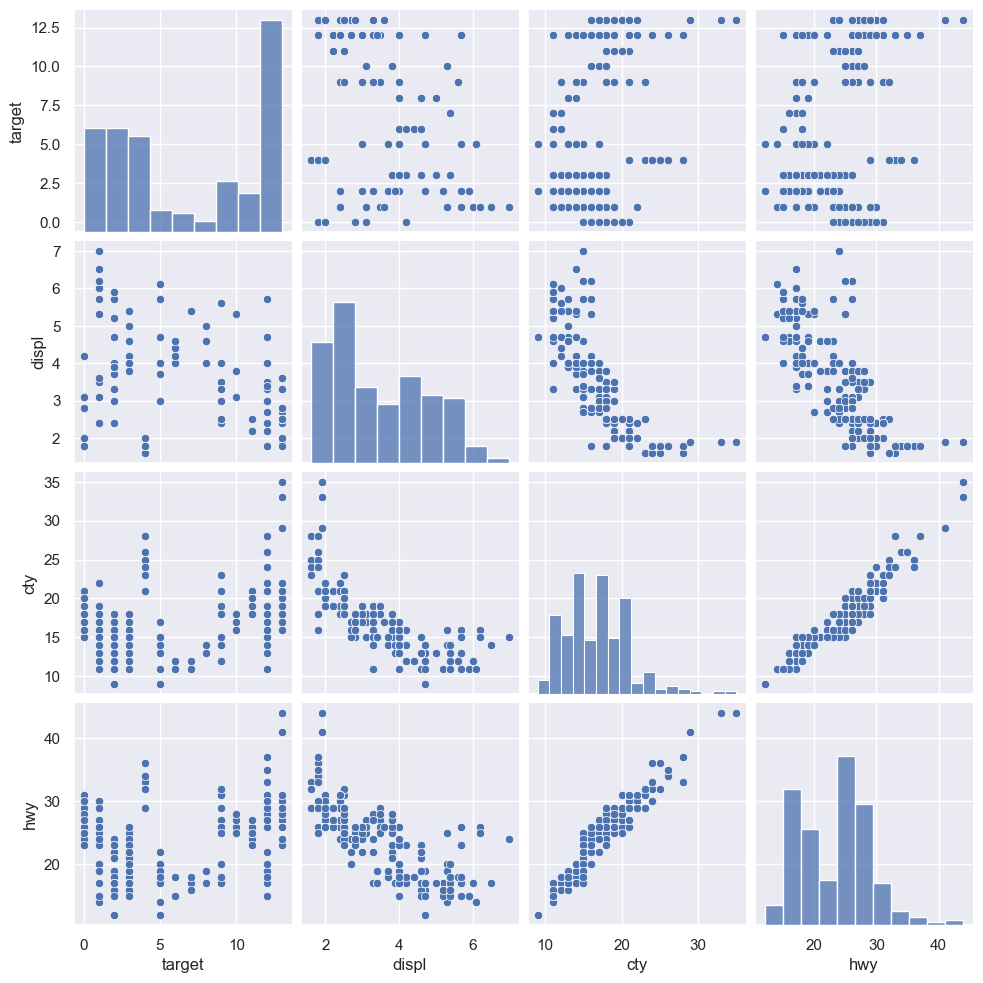

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df[["target", "displ", "cty", "hwy"]])
plt.show()

In [10]:
df = read_excel("https://data.hossam.kr/D01/mpg.xlsx")
df

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [11]:
df['Target'] = df['class']
print("데이터셋의 크기:", df.shape)
df.head()

데이터셋의 크기: (234, 13)


,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,Target
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,compact


In [12]:
df.isnull().sum()

id              0
manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
Target          0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [15]:
df['Target'].value_counts()

Target
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


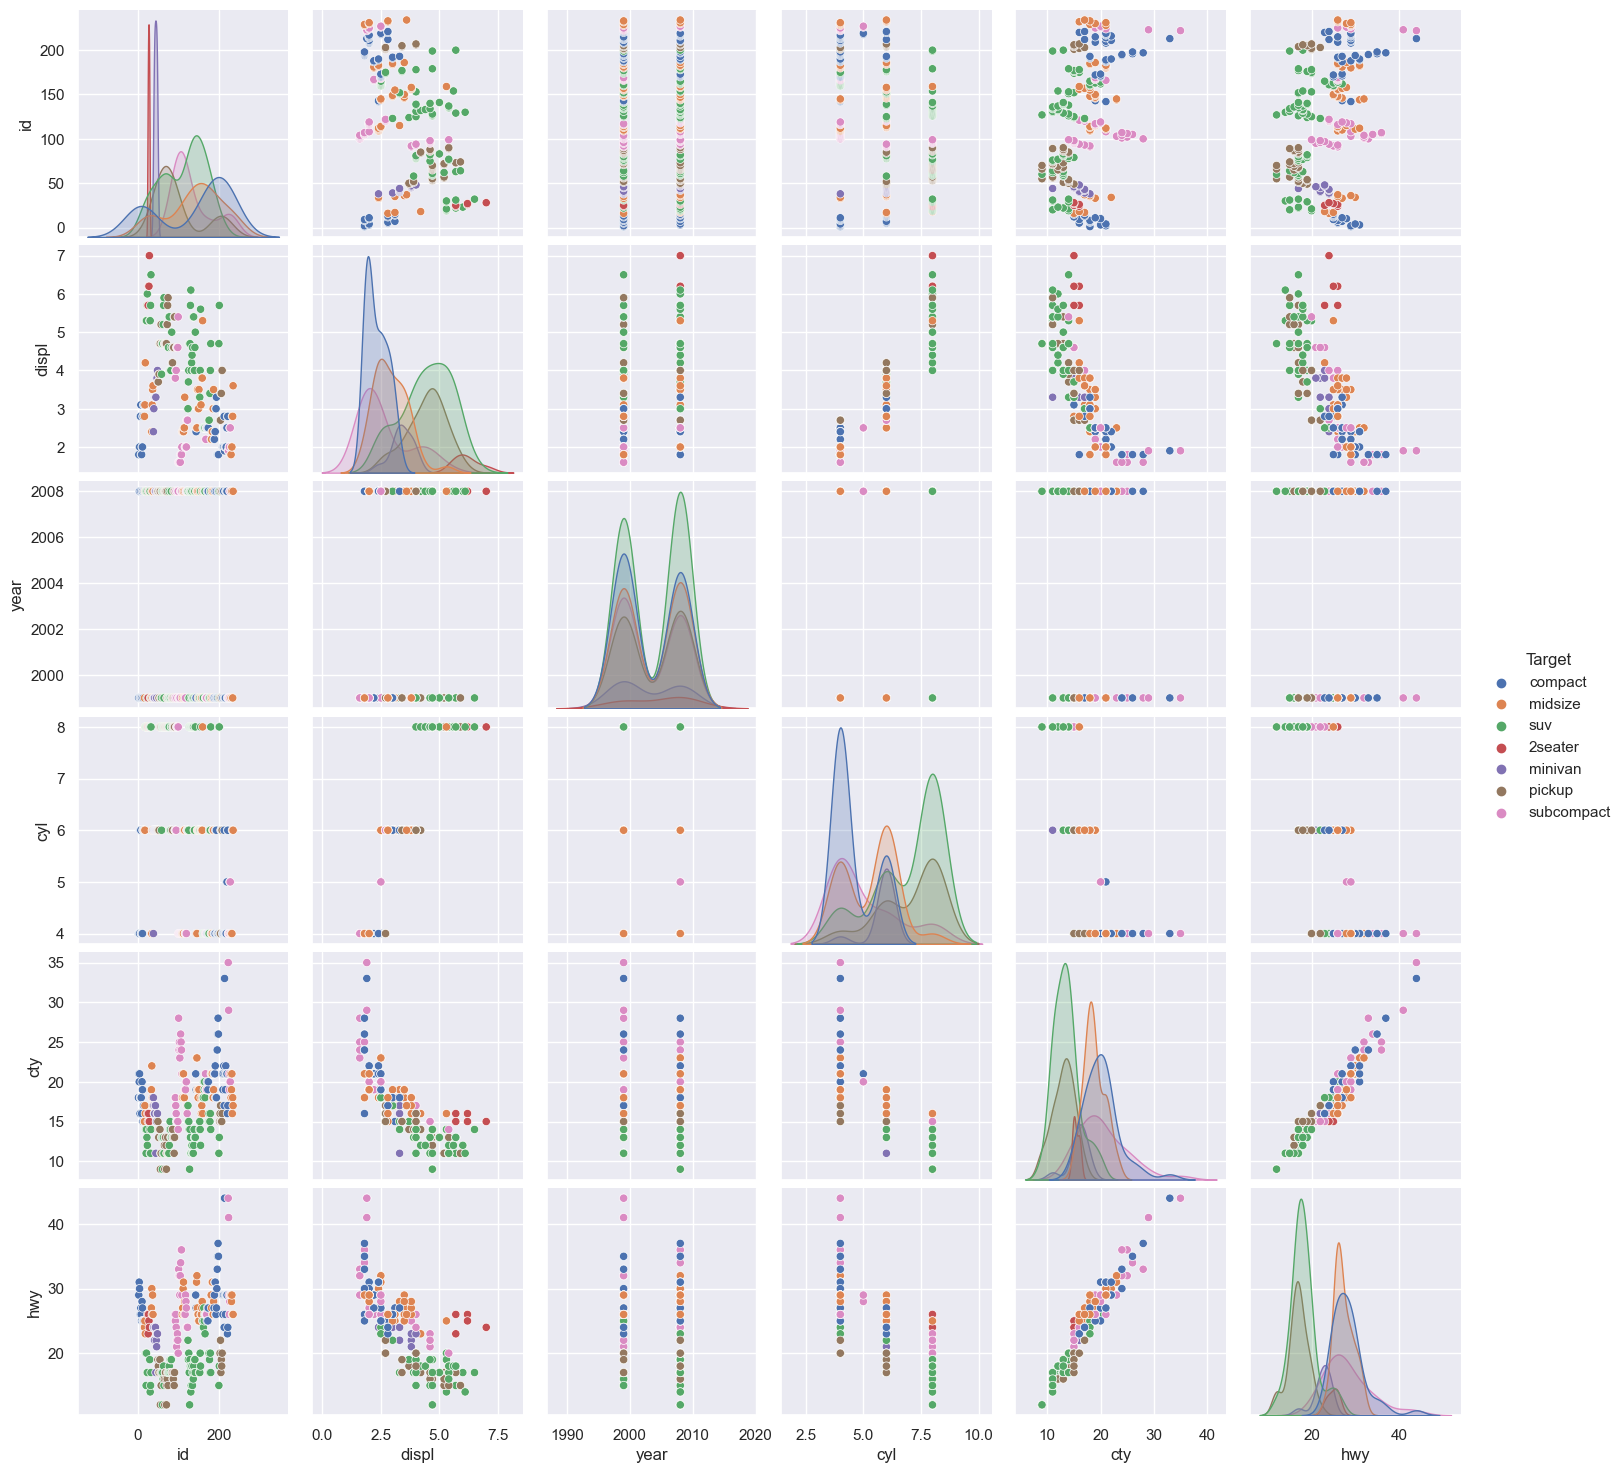

In [16]:
sns.pairplot(df, hue='Target', size=2.5, diag_kind='kde')
plt.show()

In [17]:
df = read_excel("https://data.hossam.kr/D01/mpg.xlsx")
df

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [18]:
# displ, cty, hwy
# Target을 displ로 잡기

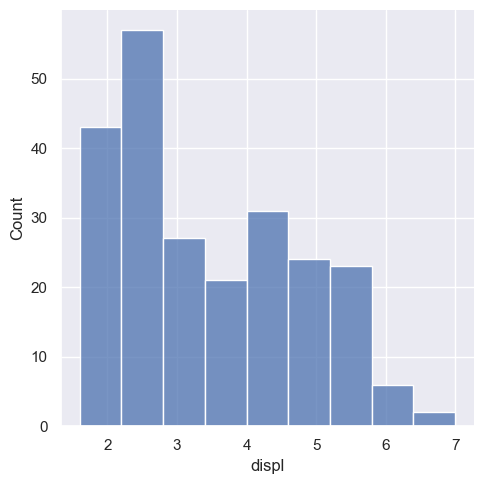

In [20]:
sns.displot(x='displ', kind='hist', data=df)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
x_data = df.loc[:,['cty','hwy']]
y_data = df.loc[:,'displ']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=20)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(187, 2) (187,)
(47, 2) (47,)


In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print("회귀계수(기울기):", np.round(lr.coef_, 1))
print("상수항(절편):", np.round(lr.intercept_,1))

회귀계수(기울기): [-0.2 -0. ]
상수항(절편): 7.6


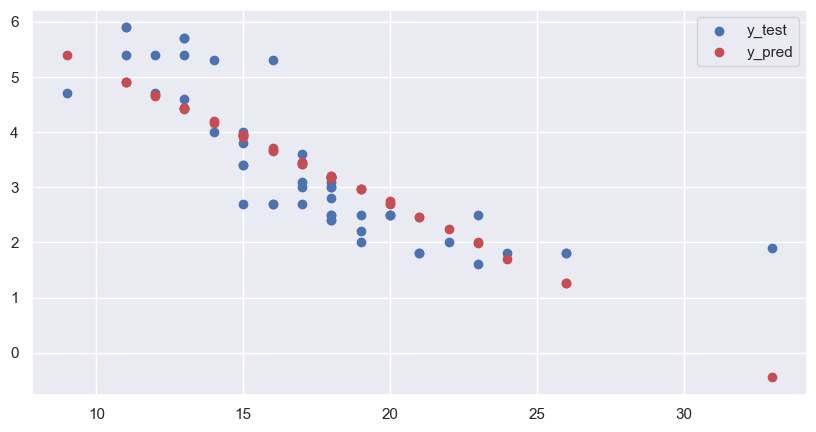

In [31]:
# 예측
y_test_pred = lr.predict(x_test)

# 예측값 실제값의 분포
plt.figure(figsize=(10,5)) # 그림또는 도표로 나타내기
plt.scatter(x_test['cty'], y_test, label='y_test')
plt.scatter(x_test['cty'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %3f" % test_mse)

Train MSE:0.602318
Test MSE: 0.602074


In [34]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_score = -1*cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("개별 Fold의 MSE:", np.round(mse_score, 4))
print("평균 MSE:%4f" % np.mean(mse_score))

개별 Fold의 MSE: [0.55   0.4455 0.4146 1.0881 0.6767]
평균 MSE:0.634977


In [35]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
print("원본 학습 데이터 셋:", x_train.shape)
print("2차 다항식 변환 데이터 셋:", x_train_poly.shape)

원본 학습 데이터 셋: (187, 2)
2차 다항식 변환 데이터 셋: (187, 6)


In [36]:

lr = LinearRegression()
lr.fit(x_train_poly, y_train) 

y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

x_test_poly = pf.fit_transform(x_test) 
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%3f" % test_mse)

Train MSE:0.528444
Test MSE:0.393210


In [37]:
# 15차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
pf = PolynomialFeatures(degree=15)
x_train_poly = pf.fit_transform(x_train)

lr = LinearRegression()
lr.fit(x_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.3f" % train_mse)

x_test_poly = pf.fit_transform(x_test)
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE: 12.538
Test MSE:289018.9428


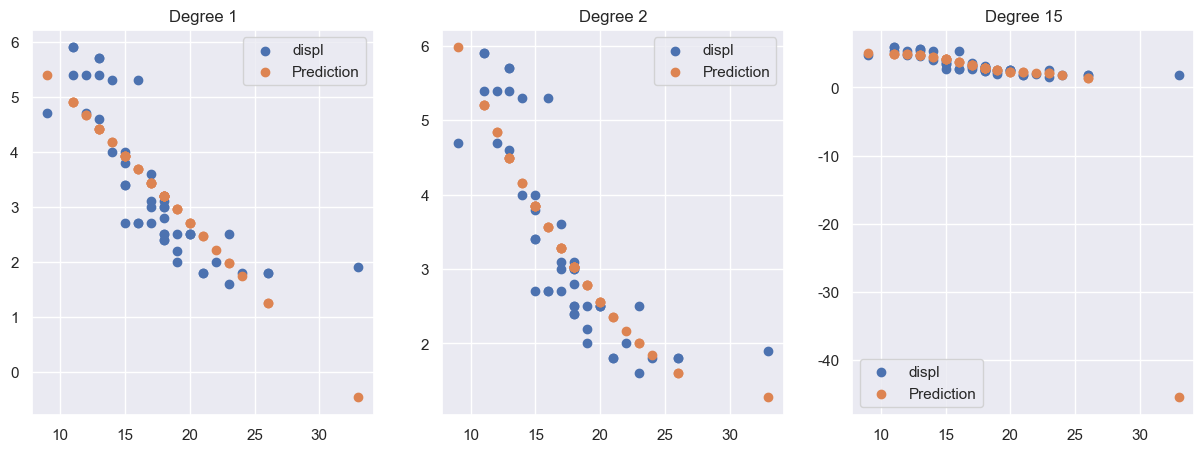

In [38]:

plt.figure(figsize=(15,5))
for n, deg in enumerate([1, 2, 15]):
    axl = plt.subplot(1,3, n+1)

    pf = PolynomialFeatures(degree=deg)
    x_train_poly = pf.fit_transform(x_train.loc[:,['cty']])
    x_test_poly = pf.fit_transform(x_test.loc[:, ['cty']])
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)
    y_test_pred = lr.predict(x_test_poly)

    plt.scatter(x_test.loc[:,['cty']], y_test, label='displ')
   
    plt.scatter(x_test.loc[:,['cty']], y_test_pred, label='Prediction')

    plt.title("Degree %d" % deg)

    plt.legend()
plt.show()

In [39]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=2.5) # 알파값으로 강도를 조정
rdg.fit(x_train_poly, y_train)

y_train_pred = rdg.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)
y_test_pred = rdg.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:1402.6399
Test MSE:1696.3937


In [41]:
from sklearn.linear_model import ElasticNet
ela = ElasticNet(alpha=0.01, l1_ratio=0.7)
ela.fit(x_train_poly, y_train)

y_train_pred = ela.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("train MSE:%.4f" % train_mse)
y_test_pred = ela.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("test_mse:%.4f" % test_mse)

train MSE:0.4876
test_mse:0.3886


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.592e+01, tolerance: 3.055e-02
  model = cd_fast.enet_coordinate_descent(


In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=3, random_state=12)
dtr.fit(x_train, y_train)

y_train_pred = dtr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = dtr.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:0.4548
Test MSE:0.3004


In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=12)
rfr.fit(x_train, y_train)

y_train_pred = rfr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = rfr.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:0.4280
Test MSE:0.3142


In [44]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(x_train, y_train)

y_train_pred = xgbr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = xgbr.predict(x_test)
text_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:0.3301
Test MSE:0.3142
